In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import time
from sentence_transformers import SentenceTransformer,util
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
from fobokiller.cosim import load_embedding , compute_sim_df ,model , summary_reviews

In [4]:
embedding = load_embedding()

2021-11-29 09:30:07.500376: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
 = compute_sim_df('good pizza with music',np.array(embedding),n_prox=3000,min_review=10)

In [34]:
df['sim_pond']=df['ratio']*df['sim']

In [35]:
df.sort_values('sim_pond',ascending=False)

,alias,rate_filtered,review_filtered,review_clean,sim,rate_all,review_all,ratio,sim_pond
207,il-brigante-paris,4.562500,10,excellent pizza. was the first place i ate in ...,0.581026,4.432432,11,0.909091,0.528206
501,pizza-julia-paris,4.617647,51,really good pizza! and super nice staff. i che...,0.554235,4.538860,60,0.850000,0.471100
499,pizza-di-loretta-paris,4.857143,10,"delicious pizzas (tastes like italy!), great a...",0.556554,4.934426,12,0.833333,0.463795
507,pizzeria-popolare-paris-2,4.210526,44,delicious and authentic pizzas. service was qu...,0.548259,4.145946,53,0.830189,0.455159
504,pizza-vesuvio-paris-3,3.518519,14,not bad at all for a pizza place in paris! i w...,0.542762,3.520000,17,0.823529,0.446980
...,...,...,...,...,...,...,...,...,...
432,les-papilles-paris-2,5.000000,1,drum roll please.... my all time favorite plac...,0.485935,4.592724,169,0.005917,0.002875
11,angelina-paris,4.000000,6,good food.. desserts are the best. overpriced ...,0.518186,4.010392,1089,0.005510,0.002855
311,lac-hong-paris,5.000000,1,good food really good! feeling like back to la...,0.529428,4.106163,204,0.004902,0.002595
339,le-champ-de-mars-paris-4,4.000000,1,beautiful restaurant with an eclectic atmosphe...,0.518914,1.577809,213,0.004695,0.002436


In [51]:
#get sim
resto_df,sentences_df = compute_sim_df(phrases_test[4],np.array(embedding),n_prox=3000,min_review=10)

In [54]:
df_test = sentences_df.merge(resto_df,on='alias',how='left',suffixes=('_s','_r'))

In [58]:
df_test.drop(columns=['review','review_clean_s','review_sentences_r'],inplace = True)

In [59]:
df_test.head()

,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
0,le-black-dog-paris,2015-11-30,4,"luckily for those eating, the music is muffled",0.663341,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.156250
1,le-verre-volé-paris-3,2018-04-04,5,"home made food, in a loud tight fitting resta...",0.614859,4.5,3.0,"omg, this place is ridiculous. seriously! home...",0.492828,3.829060,42.0,0.071429
2,kong-paris,2011-09-28,5,"however, two strikes: a serious restaurant do...",0.614458,2.2,5.0,"aaah, paris; you seduced me yet again. stark's...",0.484767,2.971429,112.0,0.044643
3,five-guys-paris,2018-05-22,3,the music is so loud you can't concentrate on...,0.614148,4.0,2.0,"this five guys is crappy. i get it, it's in a ...",0.527814,3.428105,37.0,0.054054
4,aux-trois-mailletz-paris,2018-06-04,5,you can eat inside and listen to piano music ...,0.593513,5.0,4.0,the best place on the left bank ! if you want ...,0.493608,4.376712,31.0,0.129032


In [61]:
df_test[df_test['alias']=='le-black-dog-paris']

,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
0,le-black-dog-paris,2015-11-30,4,"luckily for those eating, the music is muffled",0.663341,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.15625
157,le-black-dog-paris,2019-10-10,5,"of course, you have some dishes that will onl...",0.498988,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.15625
562,le-black-dog-paris,2019-09-26,5,food was good but i loved the music and overa...,0.467199,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.15625
833,le-black-dog-paris,2015-04-15,5,"a fine place for some steak, drinks, and great...",0.456908,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.15625
1987,le-black-dog-paris,2015-02-13,4,heavy metal and good steaks and cheap beers,0.433650,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.15625


In [62]:
wouhou = compute_sim_df(phrases_test[4],np.array(embedding),n_prox=3000,min_review=10)

In [72]:
wouhou

,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
0,le-black-dog-paris,2015-11-30,4,"luckily for those eating, the music is muffled",0.663341,4.600000,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.156250
1,le-verre-volé-paris-3,2018-04-04,5,"home made food, in a loud tight fitting resta...",0.614859,4.500000,3.0,"omg, this place is ridiculous. seriously! home...",0.492828,3.829060,42.0,0.071429
2,kong-paris,2011-09-28,5,"however, two strikes: a serious restaurant do...",0.614458,2.200000,5.0,"aaah, paris; you seduced me yet again. stark's...",0.484767,2.971429,112.0,0.044643
3,five-guys-paris,2018-05-22,3,the music is so loud you can't concentrate on...,0.614148,4.000000,2.0,"this five guys is crappy. i get it, it's in a ...",0.527814,3.428105,37.0,0.054054
4,aux-trois-mailletz-paris,2018-06-04,5,you can eat inside and listen to piano music ...,0.593513,5.000000,4.0,the best place on the left bank ! if you want ...,0.493608,4.376712,31.0,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,caffé-cambronne-paris-2,2014-11-01,5,i am so glad we found this comfortable restaurant,0.422946,5.000000,1.0,i am so glad we found this comfortable restaur...,0.422946,4.024691,11.0,0.090909
2996,chez-plumeau-paris,2011-01-07,5,"beef bourgogne, french onion soup or a salad...",0.422917,5.000000,3.0,it's so cozy and just out of the way of where ...,0.432431,4.150617,53.0,0.056604
2997,café-gustave-paris,2013-04-10,3,the place was crowded and a bit noisy but the...,0.422904,3.333333,3.0,"this review is long overdue, but i stopped her...",0.444623,2.558537,55.0,0.054545
2998,alain-ducasse-au-plaza-athénée-paris-4,2018-05-06,5,a beautiful meal & experience,0.422900,3.909091,10.0,"well, the old guard is strong with their miche...",0.437215,3.595615,55.0,0.181818


### NULL ????

In [70]:
wouhou.groupby('alias').mean().sort_values('sim_s',ascending=False)

,rate,sim_s,rate_filtered,review_filtered,sim_r,rate_all,review_all,ratio
alias,,,,,,,,
benedict-paris,5.0,0.575345,5.0,1.0,0.575345,4.376068,14.0,0.071429
drouant-paris-2,5.0,0.557053,5.0,1.0,0.557053,3.678030,26.0,0.038462
grazie-paris,3.0,0.547078,3.0,1.0,0.547078,3.889381,33.0,0.030303
sun-cafe-paris-4,5.0,0.540025,NaN,NaN,NaN,NaN,NaN,NaN
la-pointe-du-grouin-paris-10,5.0,0.537951,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
kodawari-ramen-paris-9,5.0,0.423922,5.0,1.0,0.423922,4.013514,26.0,0.038462
dragons-elysées-paris-3,4.0,0.423722,NaN,NaN,NaN,NaN,NaN,NaN
zino-paris,5.0,0.423540,5.0,1.0,0.423540,4.198413,18.0,0.055556


In [71]:
wouhou[wouhou['alias']=='yoom-paris-5']

,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
1328,yoom-paris-5,2015-07-07,5,we are dim sum fans and we will eat it anywhere,0.444756,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
wouhou.isnull().sum()

alias                   0
date                    0
rate                    0
review_sentences_s      0
sim_s                   0
rate_filtered         156
review_filtered       156
review_clean_r        156
sim_r                 156
rate_all              156
review_all            156
ratio                 156
dtype: int64

,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
38,le-village-paris-14,2019-02-25,5,wonderful food and jazzy music playing,0.532348,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,alias,date,rate,review_sentences_s,sim_s,rate_filtered,review_filtered,review_clean_r,sim_r,rate_all,review_all,ratio
0,le-black-dog-paris,2015-11-30,4,"luckily for those eating, the music is muffled",0.663341,4.6,5.0,"i didn't get a chance to eat at black dog, jus...",0.504017,4.574766,32.0,0.156250
1,le-verre-volé-paris-3,2018-04-04,5,"home made food, in a loud tight fitting resta...",0.614859,4.5,3.0,"omg, this place is ridiculous. seriously! home...",0.492828,3.829060,42.0,0.071429
2,kong-paris,2011-09-28,5,"however, two strikes: a serious restaurant do...",0.614458,2.2,5.0,"aaah, paris; you seduced me yet again. stark's...",0.484767,2.971429,112.0,0.044643
3,five-guys-paris,2018-05-22,3,the music is so loud you can't concentrate on...,0.614148,4.0,2.0,"this five guys is crappy. i get it, it's in a ...",0.527814,3.428105,37.0,0.054054
4,aux-trois-mailletz-paris,2018-06-04,5,you can eat inside and listen to piano music ...,0.593513,5.0,4.0,the best place on the left bank ! if you want ...,0.493608,4.376712,31.0,0.129032


In [87]:
wallah=compute_sim_df(phrases_test[4],np.array(embedding),min_review=10)

In [89]:
wallah.isnull().sum()

alias                   0
date                    0
rate                    0
review_clean            1
review_sentences        1
sim_s                   0
rate_filtered       18970
review_filtered     18970
sim_r               18970
rate_all            18970
review_all          18970
ratio               18970
dtype: int64

In [93]:
wallah[wallah['rate_filtered'].isnull()]

,alias,date,rate,review_clean,review_sentences,sim_s,rate_filtered,review_filtered,sim_r,rate_all,review_all,ratio
29,sun-cafe-paris-4,2014-02-22,5,delicious sushi with amazing music and atmosph...,delicious sushi with amazing music and atmosphere,0.540025,NaN,NaN,NaN,NaN,NaN,NaN
30,le-pavillon-du-lac-paris,2016-04-19,5,we had walked around the parc des buttes-chaum...,"if you would like to eat during the concert, ...",0.539318,NaN,NaN,NaN,NaN,NaN,NaN
32,la-pointe-du-grouin-paris-10,2015-08-19,5,"good music on the stereo, friendly people hang...","good music on the stereo, friendly people hang...",0.537951,NaN,NaN,NaN,NaN,NaN,NaN
38,le-village-paris-14,2019-02-25,5,this little place had the best service and gre...,wonderful food and jazzy music playing,0.532348,NaN,NaN,NaN,NaN,NaN,NaN
58,alkaram-paris,2016-05-24,5,i love good food and i love restos treat food ...,i love good food and i love restos treat food ...,0.518222,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459245,sushi-wa-paris-2,2016-07-24,1,classic tourist trap. actually it's the first ...,true -- we're only talking about an euro dif...,-0.105649,NaN,NaN,NaN,NaN,NaN,NaN
459273,la-pointe-du-grouin-paris-10,2018-03-12,2,this place was so weird. definitely a place wh...,"shady, bc that basically forced us to use the...",-0.108575,NaN,NaN,NaN,NaN,NaN,NaN
459276,kiez-biergarten-paris-4,2016-06-01,4,a german beer garden tucked away in a part of ...,major improvements have taken place since the...,-0.108915,NaN,NaN,NaN,NaN,NaN,NaN
459308,caves-saint-gilles-paris,2013-07-09,1,this is was my second time to go to this resta...,it took them a good -minutes if not more to s...,-0.115297,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
wallah[wallah['alias']=='sun-cafe-paris-4']['rate'].unique()

array([5, 4, 1, 3, 2])

### Wordclouds

In [194]:
phrases_test = [
    'I want to eat a fresh salad with shrimps and nuts.',
    'I would like a good steak!',
    "I'd love some salmon lasagna",
    "I would like some typical sushis not too expensive",
    "I would like to eat with loud music  !",
    "I want to eat in a traditional Japanese restaurant with floor seats.",
    "I’d like to brunch at a nice place with pancakes and great coffee",
    "I feel like eating ramens today!"
]

In [280]:
#wouhou = compute_sim_df(phrases_test[-2],np.array(embedding),n_prox=10000,min_review=10)
wouhou.fillna(0,inplace=True)

# select 5 first restaurants with higher sim_r 
higher_sim_r = sorted(wouhou['sim_r'].unique())[-10:]
best_sim_r = wouhou[wouhou['sim_r']>higher_sim_r[0]]


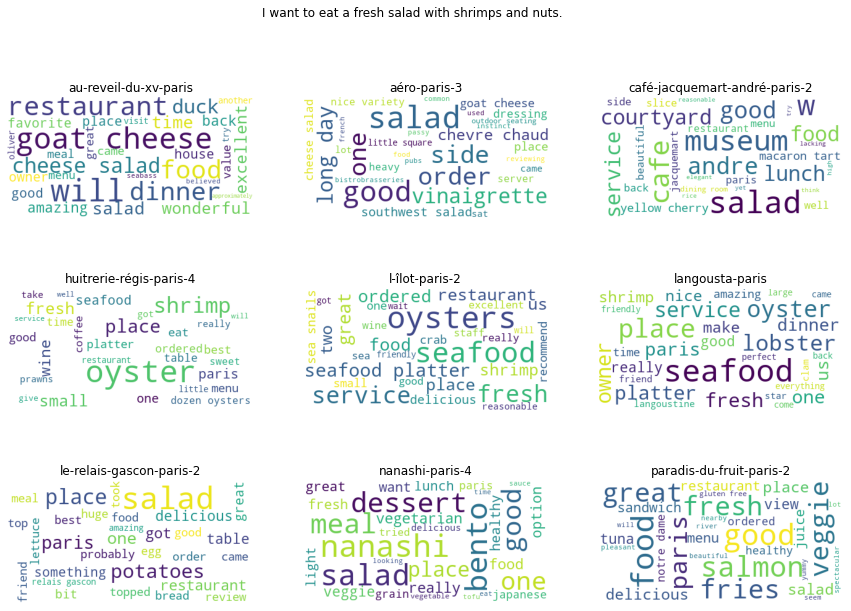

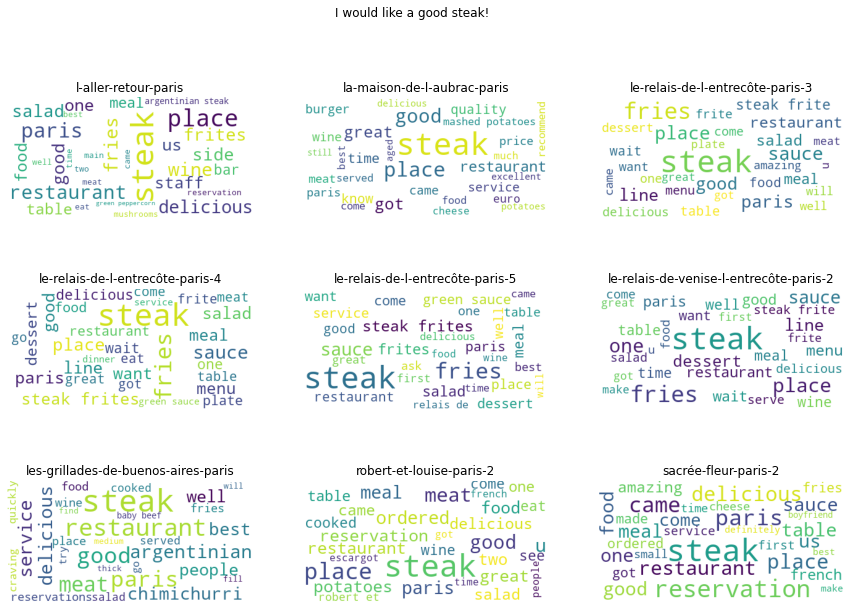

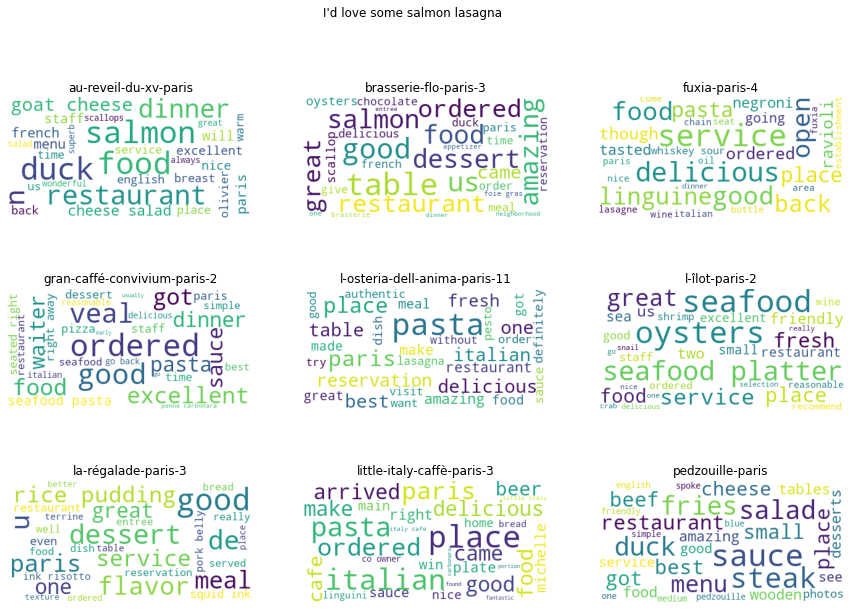

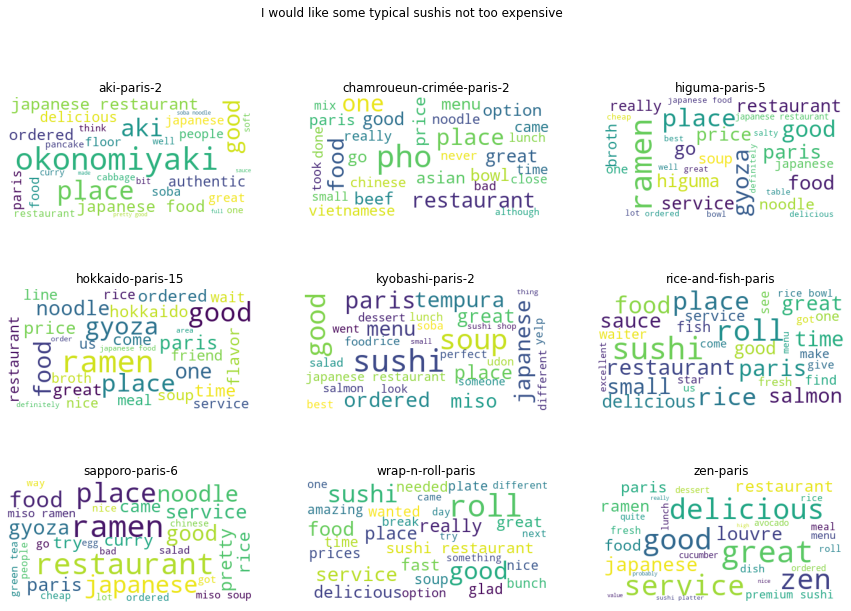

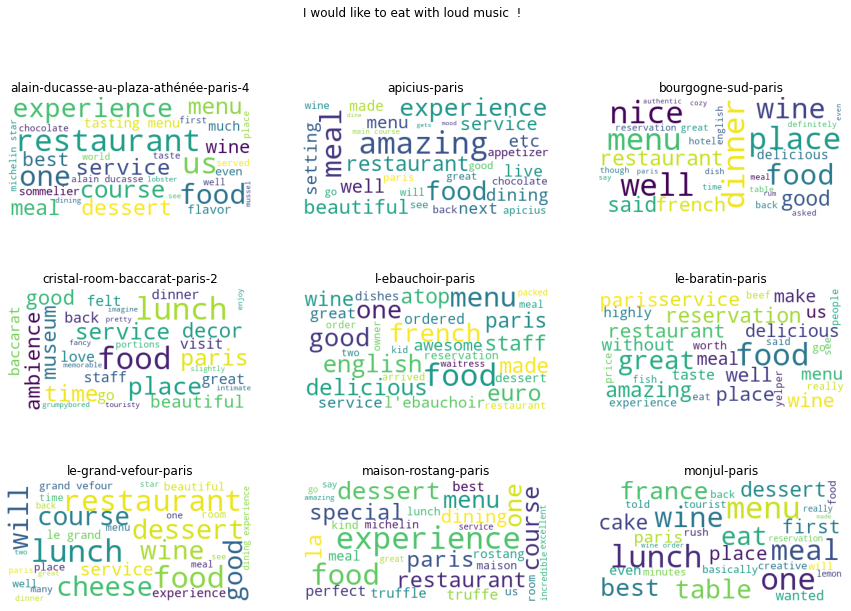

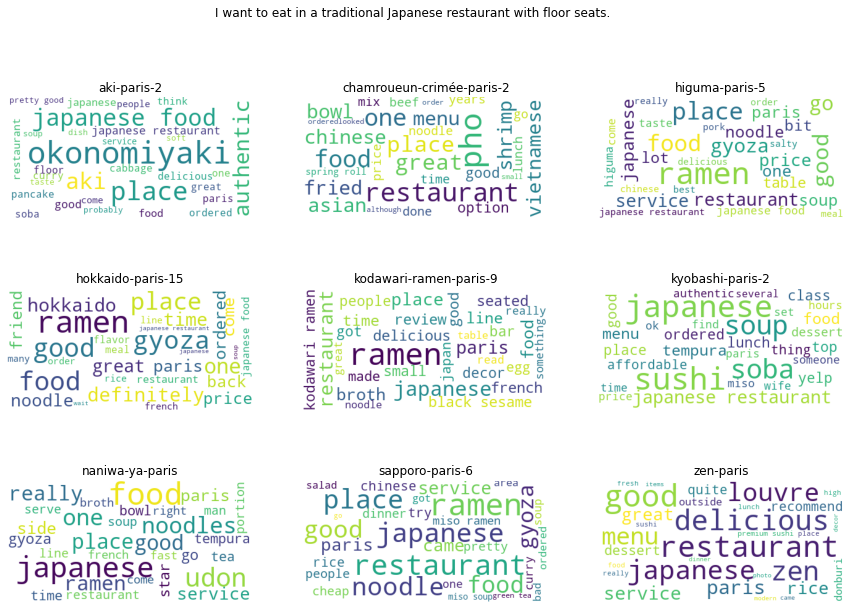

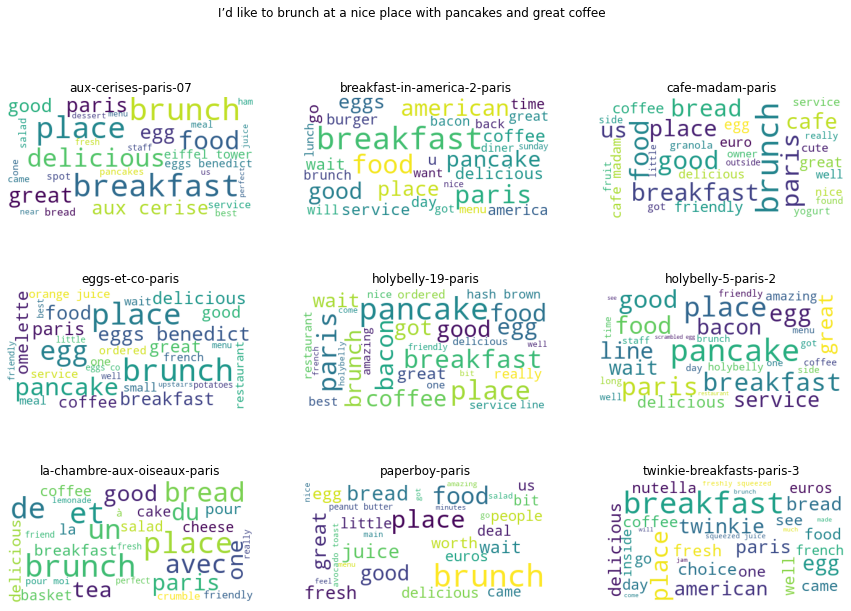

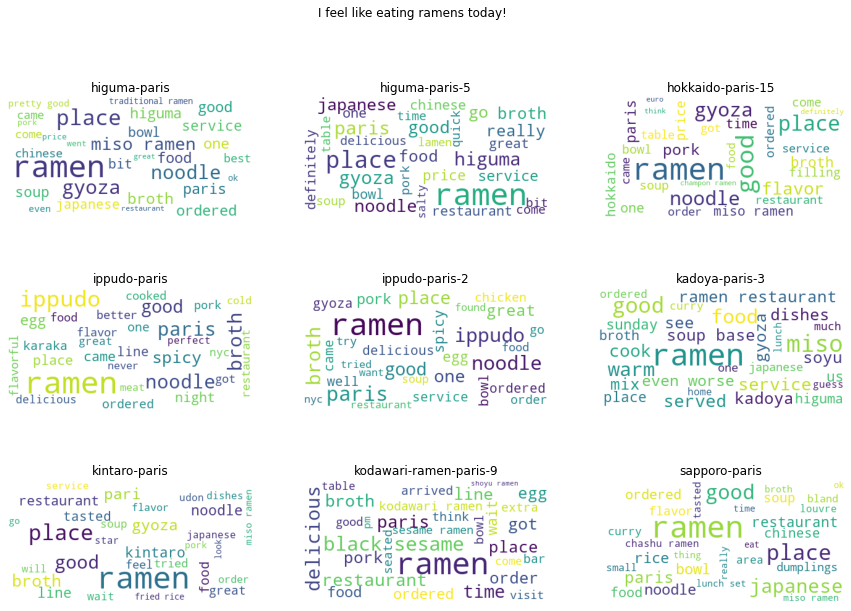

In [295]:
for p in phrases_test:
    fig , axs = plt.subplots(3,3,figsize=(15,10))
    
    result = compute_sim_df(p,np.array(embedding),n_prox=10000,min_review=10)
    reviews = summary_reviews(result,9)
    
    for i,alias in enumerate(reviews.index):
        text=reviews.loc[alias,'reviews']
        wordcloud_ = WordCloud(max_font_size=50, max_words=30,
                               background_color="white").generate(text)
        axs.flat[i].imshow(wordcloud_);
        axs.flat[i].axis('off',);
        axs.flat[i].set_title(alias);
    fig.suptitle(p)



In [299]:
result = compute_sim_df('I want to eat vegan lasagnas ',np.array(embedding),n_prox=10000,min_review=10)
reviews = summary_reviews(result,9)

In [300]:
reviews

,reviews,nb_sentences,nb_review
alias,,,
café-ginger-paris,love love love this place - we came back to pa...,40,23.0
cloud-cakes-paris,delicious! i came here several times to get co...,91,50.0
east-side-burgers-paris,this place was so cute! the pomme frites and t...,36,17.0
hank-paris-2,"i'm not a vegan, nor a vegetarian, but a meat ...",228,124.0
le-grenier-de-notre-dame-paris,omg this place was soo good .we ate here twice...,76,42.0
le-potager-du-marais-paris,one of the best vegan restaurants in paris! my...,190,85.0
tien-hiang-paris-2,"tien hiang is more than a restaurant, it's lik...",48,24.0
vegan-folies-paris,delicious vegan lasagne euros but very filling...,28,15.0
végét-halles-paris,my husband and i each did the euro course dinn...,58,30.0


In [303]:
print(reviews.loc['hank-paris-2','reviews'])

i'm not a vegan, nor a vegetarian, but a meat eater. verdict: it doesn't replace a meat burger, and i wouldn't even say it comes close, but it is something else altogether. i think that customers who are meat eaters should bare this in mind. we had burgers each and potatoes (a lot of food), but didn't feel disgusted after eating them as we would have with meat based burgers. the composition of the burgers was balanced, and although the veggie steaks are a naturally a bit dry, they did a great job with the sauces to somewhat alleviate that problem. i'd come back, and this experience has made me interested in trying hanks vegan pizza (their other store), as they really seem to know what they are doing. the store does suffer a bit from its (presumably internet-based) success - it seems too crowded to eat in during lunch and dinner, so be ready to wait for a table. it's incredibly difficult to find tasty and healthy vegetarian options in paris, and this is a very welcome addition to the ci

### Metrics


In [5]:
result = compute_sim_df('good pizza with music',np.array(embedding),n_prox=3000,min_review=10)

In [38]:
reviews = summary_reviews(result,10)

In [39]:
reviews.head()

,reviews,nb_sentences,nb_review,mean
alias,,,,
grazie-paris,{good pizza. attentive bartender. reasonable p...,38,26.0,0.443227
il-brigante-paris,{some of the best pizza in paris. reservation ...,16,10.0,0.528206
la-briciola-paris,{top notch pizza in the la republique neighbor...,44,27.0,0.437732
maria-luisa-paris-4,{really nice restaurant that caught our attent...,16,11.0,0.437906
mokus-l-ecureuil-paris,"{delicious margarita pizza, good wheat beer on...",55,37.0,0.418590


In [43]:
reviews['reviews_pond'] = reviews['nb_sentences']/reviews['nb_sentences'].sum()
reviews['metric_pond']=reviews['reviews_pond']*reviews['mean']

In [44]:
reviews.sort_values('mean')

,reviews,nb_sentences,nb_review,mean,reviews_pond,metric_pond
alias,,,,,,
mokus-l-ecureuil-paris,"{delicious margarita pizza, good wheat beer on...",55,37.0,0.418590,0.135135,0.056566
o-scia-paris,{yummm!! this place is the best!! i came here ...,19,15.0,0.419488,0.046683,0.019583
la-briciola-paris,{top notch pizza in the la republique neighbor...,44,27.0,0.437732,0.108108,0.047322
maria-luisa-paris-4,{really nice restaurant that caught our attent...,16,11.0,0.437906,0.039312,0.017215
grazie-paris,{good pizza. attentive bartender. reasonable p...,38,26.0,0.443227,0.093366,0.041382
pizza-vesuvio-paris-3,{i used to come here frequently when i lived i...,27,14.0,0.446980,0.066339,0.029652
pizzeria-popolare-paris-2,{those were the best pizzas that i have ever e...,76,44.0,0.455159,0.186732,0.084993
pizza-di-loretta-paris,{delicious pizza! especially the mushroom-tast...,14,10.0,0.463795,0.034398,0.015954
pizza-julia-paris,"{i followed everyone on yelps reviews, and wou...",102,51.0,0.471100,0.250614,0.118064


In [45]:
reviews.sort_values('metric_pond')

,reviews,nb_sentences,nb_review,mean,reviews_pond,metric_pond
alias,,,,,,
pizza-di-loretta-paris,{delicious pizza! especially the mushroom-tast...,14,10.0,0.463795,0.034398,0.015954
maria-luisa-paris-4,{really nice restaurant that caught our attent...,16,11.0,0.437906,0.039312,0.017215
o-scia-paris,{yummm!! this place is the best!! i came here ...,19,15.0,0.419488,0.046683,0.019583
il-brigante-paris,{some of the best pizza in paris. reservation ...,16,10.0,0.528206,0.039312,0.020765
pizza-vesuvio-paris-3,{i used to come here frequently when i lived i...,27,14.0,0.446980,0.066339,0.029652
grazie-paris,{good pizza. attentive bartender. reasonable p...,38,26.0,0.443227,0.093366,0.041382
la-briciola-paris,{top notch pizza in the la republique neighbor...,44,27.0,0.437732,0.108108,0.047322
mokus-l-ecureuil-paris,"{delicious margarita pizza, good wheat beer on...",55,37.0,0.418590,0.135135,0.056566
pizzeria-popolare-paris-2,{those were the best pizzas that i have ever e...,76,44.0,0.455159,0.186732,0.084993
